In [1]:
# Pandas
import pandas as pd
from sqlalchemy import create_engine
from sql_config import user_name,password,host_name,db_name

engine = create_engine(f'postgresql+psycopg2://{user_name}:{password}@{host_name}:5432/{db_name}')
connection = engine.connect()


In [2]:
data = pd.read_sql(f"select e.first_name, e.last_name, e.sex from employees e ", connection)

In [3]:
data.head()

,first_name,last_name,sex
0,Hideyuki,Zallocco,M
1,Byong,Delgrande,F
2,Berry,Babb,F
3,Xiong,Verhoeff,M
4,Abdelkader,Baumann,F


In [4]:
len(data)

300024

In [5]:
emp_salary = pd.read_sql(f"select * from penn_info.employee_salary_view ", connection)
emp_salary.head()

,emp_no,last_name,first_name,salary
0,205000,Griswold,Charmane,129492.0
1,44188,Peac,Slavian,127238.0
2,444756,Varker,Nahid,127041.0
3,458302,Esposito,Poorav,126703.0
4,37558,Thambidurai,Juichirou,125469.0


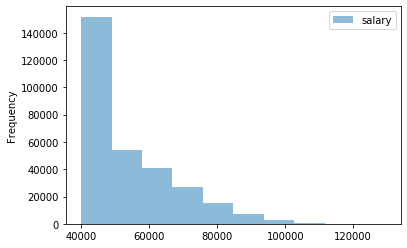

In [6]:
df_sal = emp_salary['salary']
df = pd.DataFrame(df_sal)
ax = df.plot.hist(bins=10, alpha=.5)

In [7]:
emp_title_salary = pd.read_sql(f"select * from penn_info.employee_salary_by_title_view ", connection)
emp_title_salary.head()

,emp_no,last_name,first_name,title,salary
0,10405,Budinsky,Hilary,Assistant Engineer,40000.0
1,10719,Karunanithi,Guenter,Assistant Engineer,40000.0
2,10755,Ressouche,Odysseas,Assistant Engineer,40000.0
3,11101,Horswill,Manibrata,Assistant Engineer,40000.0
4,11316,Farrar,Ult,Assistant Engineer,40000.0


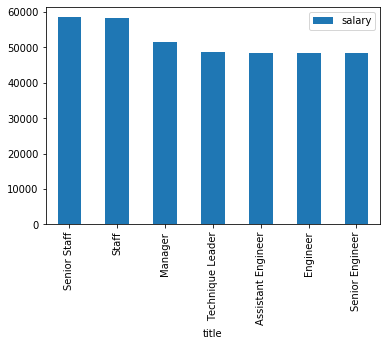

In [8]:
df_avg_sal = emp_title_salary
df_avg_sal = df_avg_sal.groupby(["title"]).mean()["salary"]
df_avg_sal = pd.DataFrame(df_avg_sal)
df_avg_sal = df_avg_sal.reset_index().sort_values('salary', ascending=False)
df = df_avg_sal
ax = df.plot.bar(x='title', y='salary', rot=90)